In [1]:
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Data Video Games'

/content/drive/My Drive/Data Video Games


In [3]:
ls

Video_Games_Sales.csv


In [4]:
import pandas as pd
import numpy as np

In [5]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 225kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [6]:
df = pd.read_csv('Video_Games_Sales.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(16719, 16)

In [8]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [11]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [12]:
df = df.dropna(subset = ['Year_of_Release'])

In [13]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         8987
User_Count         8987
Developer          6543
Rating             6681
dtype: int64


In [14]:
#fill data Year of Release

#df.Year_of_Release = df.Year_of_Release.fillna(df.Year_of_Release.mean())

In [15]:
#df.Year_of_Release = df.Year_of_Release.astype('int32')
#df.Year_of_Release

In [16]:
df["Name"].fillna( "Unknown", inplace = True)

In [17]:
df.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081861
Activision                      0.059447
Namco Bandai Games              0.056950
Ubisoft                         0.056645
Konami Digital Entertainment    0.050250
                                  ...   
T&E Soft                        0.000061
Takuyo                          0.000061
Revolution (Japan)              0.000061
Aques                           0.000061
King Records                    0.000061
Name: Publisher, Length: 579, dtype: float64

In [18]:
#To replace value we can use mode to get 'Electronic Arts'.

df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

In [19]:
df.Genre.value_counts(normalize=True)

Action          0.201119
Sports          0.140199
Misc            0.104633
Role-Playing    0.090163
Shooter         0.078794
Adventure       0.078611
Racing          0.074538
Platform        0.053380
Simulation      0.052164
Fighting        0.050888
Strategy        0.040917
Puzzle          0.034594
Name: Genre, dtype: float64

In [20]:
df.Genre = df.Genre.fillna(df.Genre.mode()[0])

In [21]:
#df.Critic_Score = df.Critic_Score.fillna(0)
#df.User_Score = df.User_Score.fillna(0)

In [22]:
print(df.isnull().sum())

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         8987
User_Count         8987
Developer          6543
Rating             6681
dtype: int64


In [23]:
df_null = df[df.isnull().any(axis=1)]
df_null.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_null.shape

(9624, 16)

In [25]:
# import graph library
import matplotlib.pyplot as plt

In [26]:
numeric_column = ['NA_Sales', 'EU_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


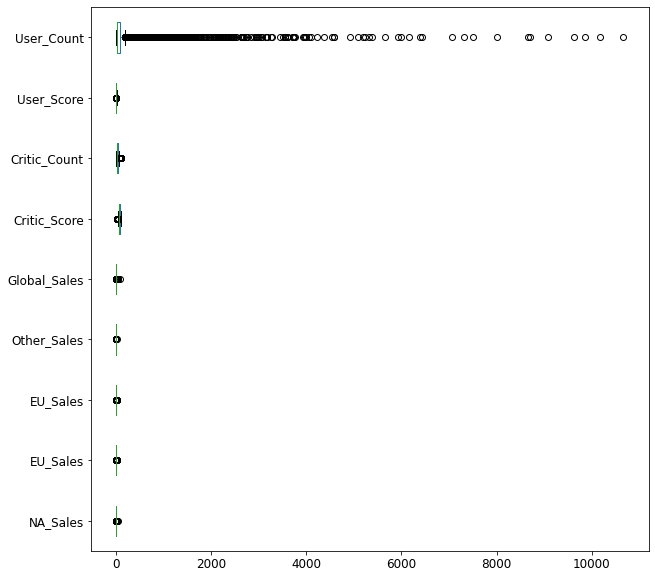

In [27]:
# check outlier using boxplot
df.boxplot(column=numeric_column,fontsize=12,rot=0,grid=False,figsize=(10,10),vert=False)

In [28]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16450.0,0.264041,0.818324,0.00,0.00,0.08,0.24,41.36
EU_Sales,16450.0,0.145909,0.506639,0.00,0.00,0.02,0.11,28.96
JP_Sales,16450.0,0.078464,0.311046,0.00,0.00,0.00,0.04,10.22
Other_Sales,16450.0,0.047582,0.187973,0.00,0.00,0.01,0.03,10.57
Global_Sales,16450.0,0.536252,1.558437,0.01,0.06,0.17,0.47,82.53
Critic_Score,7983.0,68.994363,13.920060,13.00,60.00,71.00,79.00,98.00
Critic_Count,7983.0,26.441313,19.008136,3.00,12.00,22.00,36.00,113.00
User_Score,7463.0,7.126330,1.499447,0.00,6.40,7.50,8.20,9.70
User_Count,7463.0,163.015141,563.863327,4.00,10.00,24.00,81.00,10665.00


In [29]:
 uniqueValues = (df['Platform'].append(df['Developer'])).unique()
 print(uniqueValues)

['Wii' 'NES' 'GB' ... 'Big Red Software' 'Atomic Games'
 'Interchannel-Holon']


In [30]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [31]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [32]:
df['Developer'].unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [33]:
df['Developer'].nunique(dropna=False)

1681

In [34]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
     

In [35]:
df['Publisher'].nunique(dropna=False)

579

### Sales Analysis

In [36]:
df_sales = df.loc[:,'Name':'Global_Sales' ]
df_sales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [37]:
df_sales.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [38]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16450 non-null  object 
 1   Platform         16450 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16450 non-null  object 
 4   Publisher        16450 non-null  object 
 5   NA_Sales         16450 non-null  float64
 6   EU_Sales         16450 non-null  float64
 7   JP_Sales         16450 non-null  float64
 8   Other_Sales      16450 non-null  float64
 9   Global_Sales     16450 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [39]:
#df_sales.dropna(inplace=True)
#df_sales.isna().sum()

In [40]:
df_sales.Name.value_counts()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA 14                         9
Terraria                        8
                               ..
99 no Namida                    1
Championship Surfer             1
Walk it Out!                    1
Kaijuu Busters Powered          1
Evolution Snowboarding          1
Name: Name, Length: 11430, dtype: int64

In [41]:
import seaborn as sns
import plotly.express as px
import matplotlib.lines as mlines


In [42]:
# Get Top 10 Video Games Publishers
top_10_publishers = df_sales.Publisher.value_counts().head(10)

px.bar(top_10_publishers, title='Top 10 Video Game Pubishers', 
       labels={
           'value': "Number of Games Publishing",
           'index': "Name of the Publisher"
       })

In [43]:
# Get Top 10 Video Games Genre
top_10_generes = df_sales.Genre.value_counts()
# top_10_generes

fig =px.bar(top_10_generes, title='Top 10 Video Game Genres', 
       labels={
           'value': "Number of Games Genres",
           'index': "Name of the Genre"
       })

fig.show()


In [44]:
# Get Top 10 Video Games Genre
top_10_platform = df_sales.Platform.value_counts().head(10)
# top_10_generes

fig =px.bar(top_10_platform, title='Top 10 Video Game Platform', 
       labels={
           'value': "Number of Games Platform",
           'index': "Name of the Platform"
       })

fig.show()


In [45]:
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

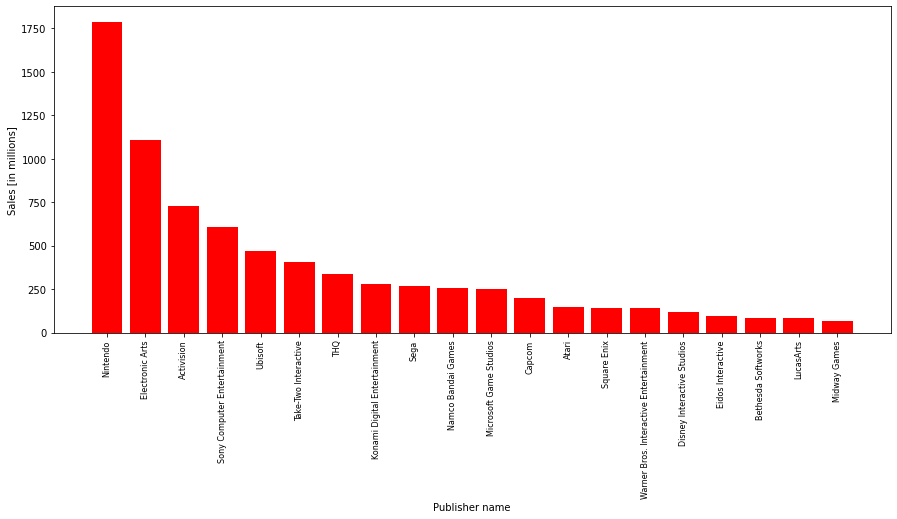

In [46]:
#Top 20 Global Sales according to Publisher

y=df_sales.groupby("Publisher").Global_Sales.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='red')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Publisher name')
plt.show()

In [47]:
df_sales.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

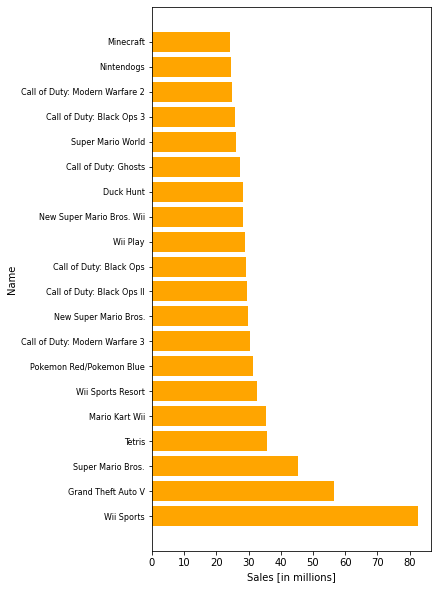

In [48]:
y=df_sales.groupby("Name").Global_Sales.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(5,10))
plt.barh(y.index,y.values,color='orange')
plt.yticks(y.index,size=8)
plt.xlabel('Sales [in millions]')
plt.ylabel('Name')
plt.show()

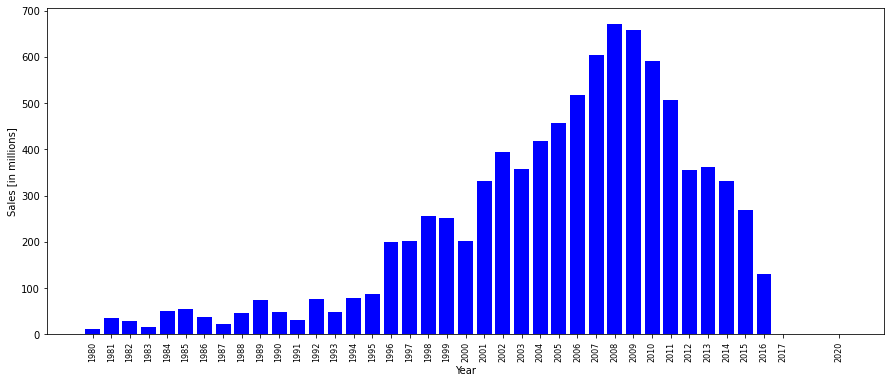

In [49]:
#Global Sales according to Year

y=df_sales.groupby("Year_of_Release").Global_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='blue')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Year')
plt.show()

Text(0.5, 0, 'Year_of_Release')

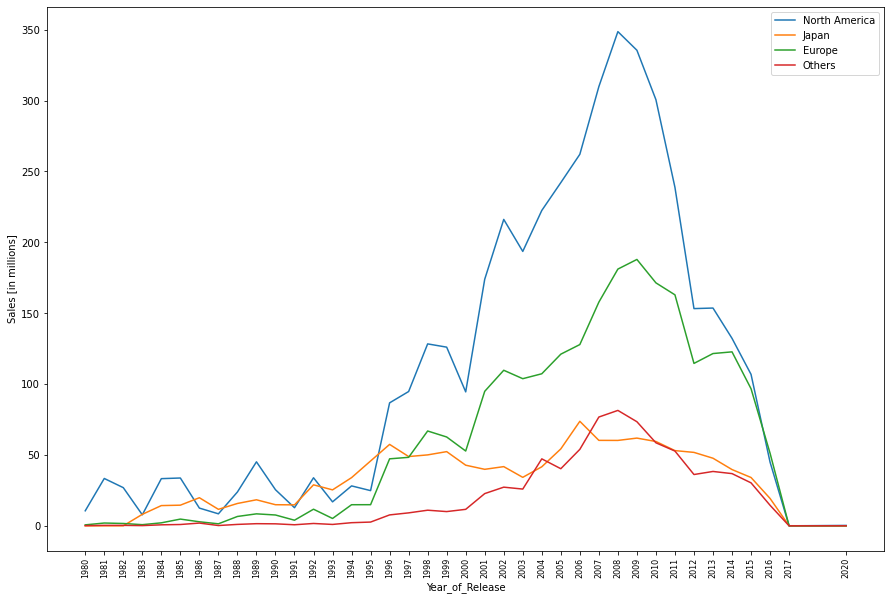

In [50]:
#NA vs Japan vs EU vs Other Sales by the year

n=df_sales.groupby('Year_of_Release').NA_Sales.sum()
j=df_sales.groupby('Year_of_Release').JP_Sales.sum()
e=df_sales.groupby('Year_of_Release').EU_Sales.sum()
o=df_sales.groupby('Year_of_Release').Other_Sales.sum()
plt.figure(figsize=(15,10))
plt.grid
plt.plot(n.index,n.values,label='North America')
plt.plot(j.index,j.values,label='Japan')
plt.plot(e.index,e.values,label='Europe')
plt.plot(o.index,o.values,label='Others')
plt.xticks(n.index,rotation='vertical',size=8)
plt.legend()
plt.ylabel('Sales [in millions]')
plt.xlabel('Year_of_Release')

Text(0.5, 0, 'Genre')

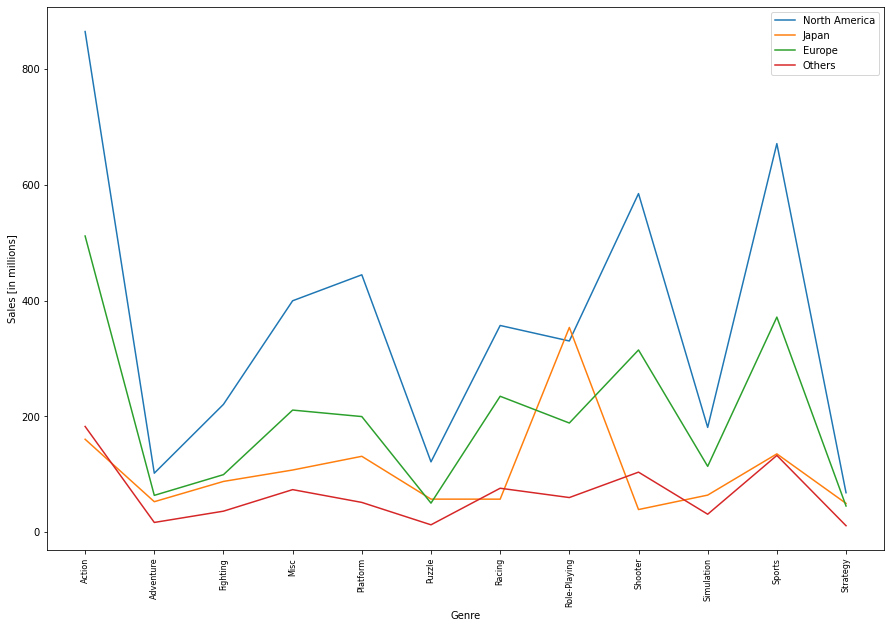

In [136]:
#NA vs Japan vs EU vs Other Sales by the year

n=df_sales.groupby('Genre').NA_Sales.sum()
j=df_sales.groupby('Genre').JP_Sales.sum()
e=df_sales.groupby('Genre').EU_Sales.sum()
o=df_sales.groupby('Genre').Other_Sales.sum()
plt.figure(figsize=(15,10))
plt.grid
plt.plot(n.index,n.values,label='North America')
plt.plot(j.index,j.values,label='Japan')
plt.plot(e.index,e.values,label='Europe')
plt.plot(o.index,o.values,label='Others')
plt.xticks(n.index,rotation='vertical',size=8)
plt.legend()
plt.ylabel('Sales [in millions]')
plt.xlabel('Genre')

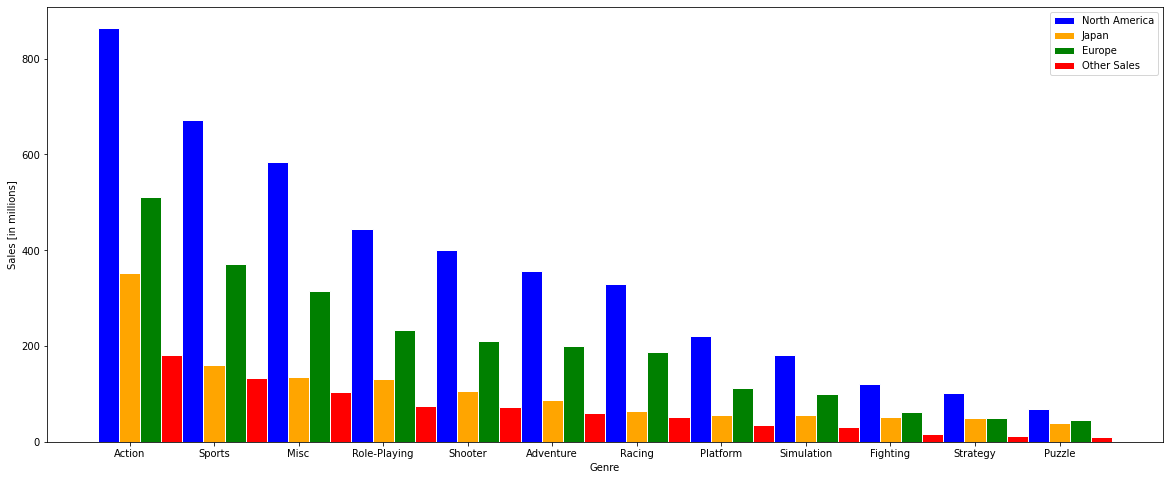

In [163]:
#Global Sales according to Year


barWidth = 0.25
y1=df_sales.groupby("Genre").NA_Sales.sum().sort_values(ascending=False)
y2=df_sales.groupby("Genre").JP_Sales.sum().sort_values(ascending=False)
y3=df_sales.groupby("Genre").EU_Sales.sum().sort_values(ascending=False)
y4=df_sales.groupby("Genre").Other_Sales.sum().sort_values(ascending=False)

r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]


plt.figure(figsize=(20,8))
plt.bar(r1,y1.values,width = barWidth ,color='blue', edgecolor='white', label ='North America')
plt.bar(r2,y2.values,width = barWidth ,color='orange',edgecolor='white', label ='Japan')
plt.bar(r3,y3.values,width = barWidth ,color='green', edgecolor='white', label ='Europe')
plt.bar(r4,y4.values,width = barWidth ,color='red', edgecolor='white', label ='Other Sales')
#plt.xticks(y.index,rotation='vertical',size=8)
plt.xticks([r + barWidth for r in range(len(y1))], ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting','Strategy','Puzzle'])
plt.ylabel('Sales [in millions]')
plt.legend()
plt.xlabel('Genre')
plt.show()

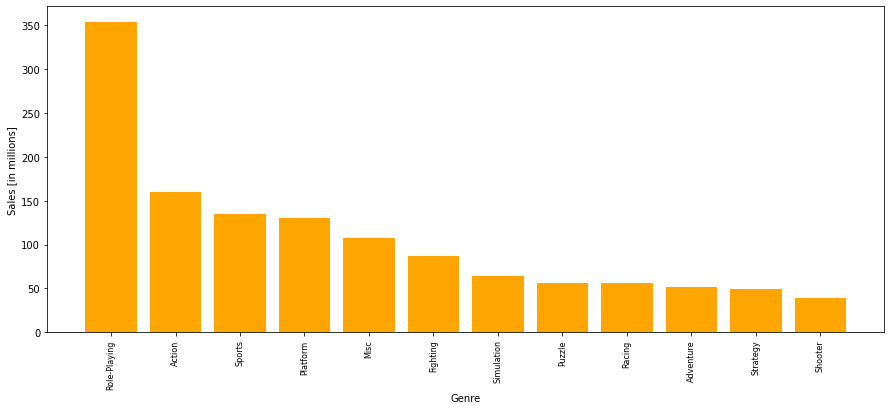

In [168]:
#Japan Sales according to Genre

y=df_sales.groupby("Genre").JP_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='orange')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Genre')
plt.show()

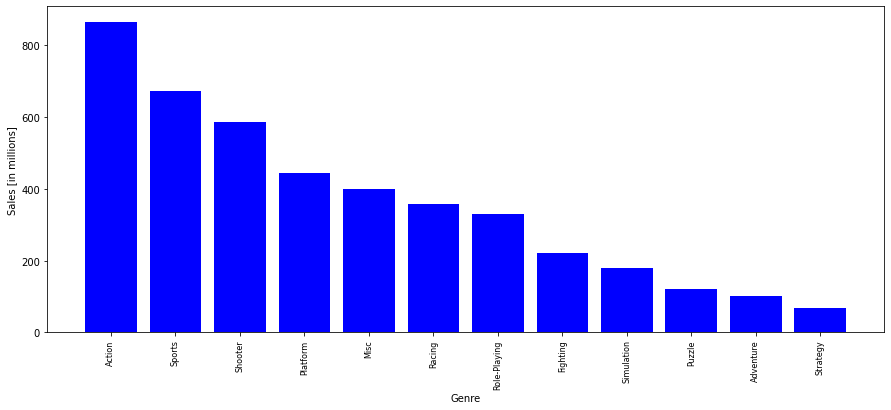

In [175]:
#North America according to Genre

y=df_sales.groupby("Genre").NA_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='blue')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Genre')
plt.show()

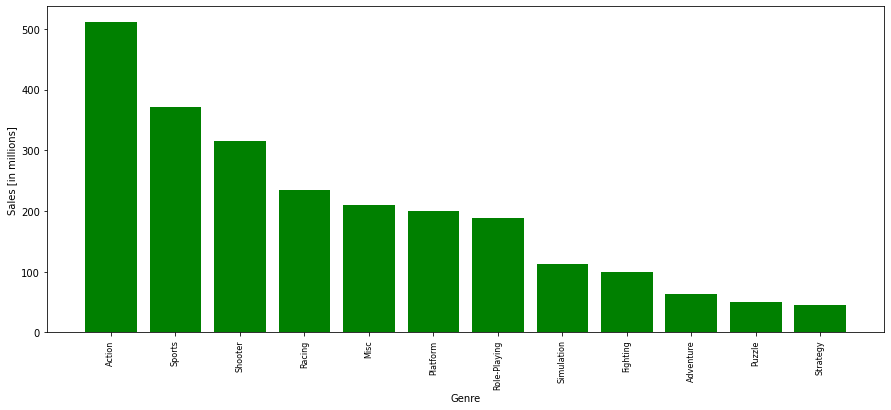

In [176]:
#Europe according to Genre

y=df_sales.groupby("Genre").EU_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='green')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Genre')
plt.show()

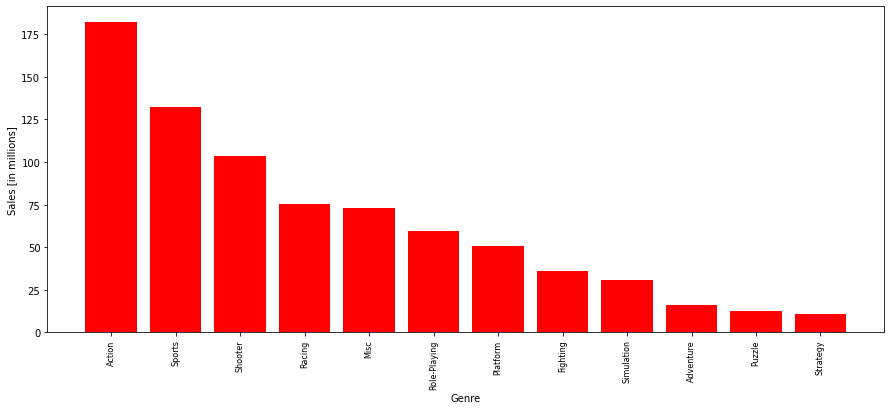

In [177]:
#Other Sales according to Genre

y=df_sales.groupby("Genre").Other_Sales.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='red')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Sales [in millions]')
plt.xlabel('Genre')
plt.show()

In [52]:
#Top 20 Global Sales according to Publisher

#y=df_sales.groupby("Publisher").Global_Sales.sum().sort_values(ascending=False).head(20)
#plt.figure(figsize=(15,6))
#plt.bar(y.index,y.values,color='red')
#plt.xticks(y.index,rotation='vertical',size=8)
#plt.ylabel('Sales [in millions]')
#plt.xlabel('Publisher name')
#plt.show()

In [53]:
#Top 20 Global Sales according to Publisher

#y=df_sales.groupby("Platform").Global_Sales.sum().sort_values(ascending=False).head(20)
#plt.figure(figsize=(15,6))
#plt.bar(y.index,y.values,color='brown')
#plt.xticks(y.index,rotation='vertical',size=8)
#plt.ylabel('Sales [in millions]')
#plt.xlabel('Platform name')
#plt.show()

In [54]:
#Global Sales according to genre

#y=df_sales.groupby("Genre").Global_Sales.sum().sort_values(ascending=False)
#plt.figure(figsize=(15,6))
#plt.barh(y.index,y.values,color='green')
#plt.yticks(y.index,size=8)
#plt.xlabel('Sales [in millions]')
#plt.ylabel('Genre')
#plt.show()

## Critic & User Analysis

In [55]:
df_critic = df[['Year_of_Release','Global_Sales','Critic_Score','Critic_Count','User_Score','User_Count']]

In [56]:
df_critic.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
Global_Sales,16450.0,0.536252,1.558437,0.01,0.06,0.17,0.47,82.53
Critic_Score,7983.0,68.994363,13.920060,13.00,60.00,71.00,79.00,98.00
Critic_Count,7983.0,26.441313,19.008136,3.00,12.00,22.00,36.00,113.00
User_Score,7463.0,7.126330,1.499447,0.00,6.40,7.50,8.20,9.70
User_Count,7463.0,163.015141,563.863327,4.00,10.00,24.00,81.00,10665.00


In [57]:
df_critic.isnull().sum()

Year_of_Release       0
Global_Sales          0
Critic_Score       8467
Critic_Count       8467
User_Score         8987
User_Count         8987
dtype: int64

In [58]:
df_critic.shape

(16450, 6)

In [59]:
df_clean = df_critic.dropna()
df_clean.shape

(6894, 6)

In [60]:
df_clean.isnull().sum()

Year_of_Release    0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

In [61]:
df_score = df_critic[['Year_of_Release','Global_Sales','Critic_Score','User_Score']]

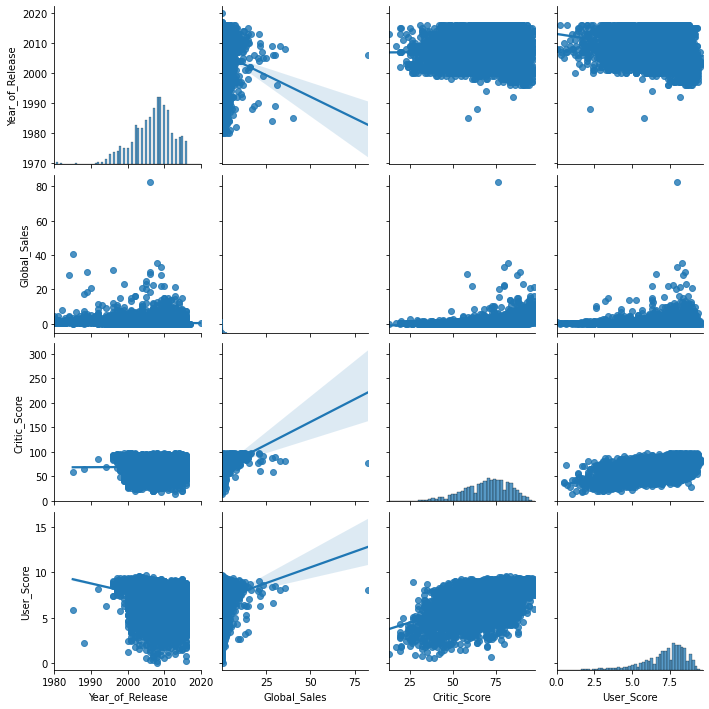

In [62]:
sns.pairplot(df_score, kind="reg")

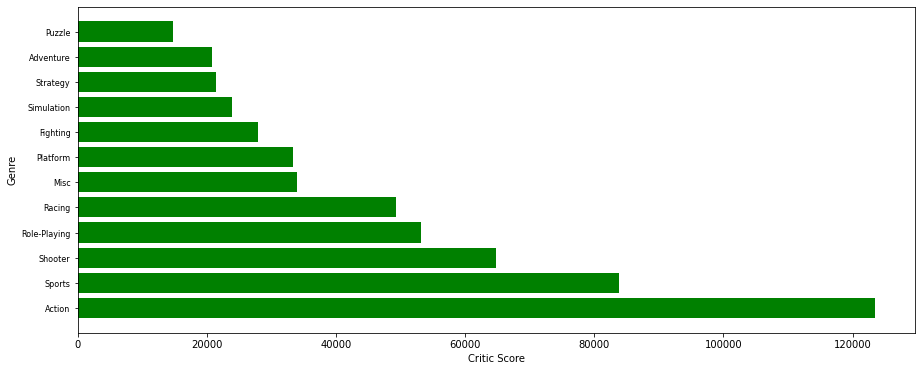

In [63]:
#Critic Score according to Genre

y=df.groupby("Genre").Critic_Score.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.barh(y.index,y.values,color='green')
plt.yticks(y.index,size=8)
plt.xlabel('Critic Score')
plt.ylabel('Genre')
plt.show()

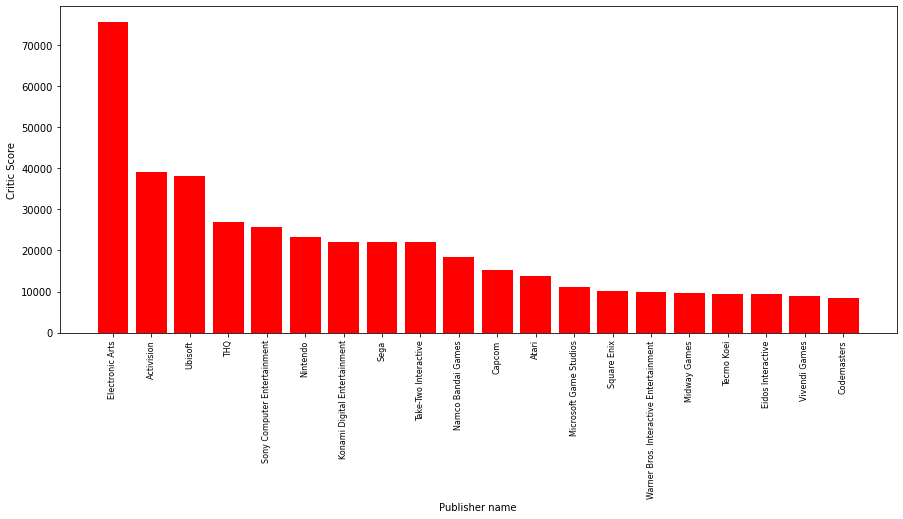

In [64]:
#Critic Score according to Publisher

y=df.groupby("Publisher").Critic_Score.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='red')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Critic Score')
plt.xlabel('Publisher name')
plt.show()

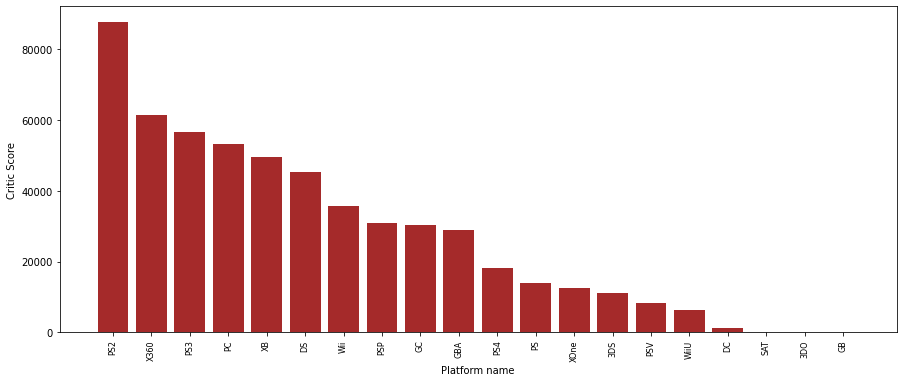

In [65]:
#Critic Score according to Platform

y=df.groupby("Platform").Critic_Score.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='brown')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('Critic Score')
plt.xlabel('Platform name')
plt.show()

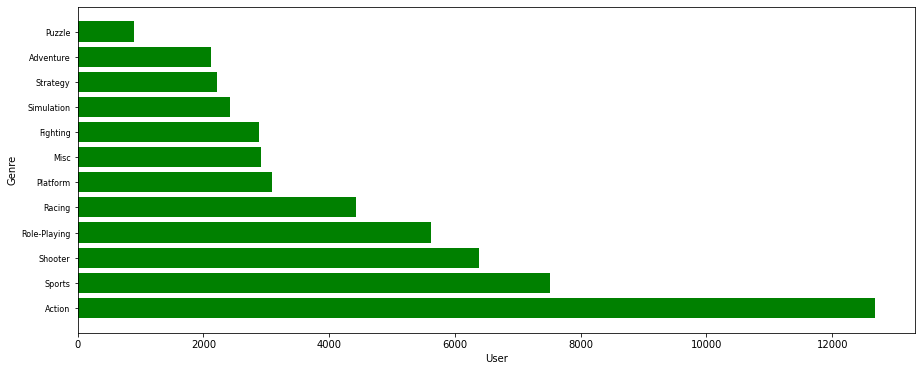

In [66]:
#User Score according to Genre

y=df.groupby("Genre").User_Score.sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
plt.barh(y.index,y.values,color='green')
plt.yticks(y.index,size=8)
plt.xlabel('User')
plt.ylabel('Genre')
plt.show()

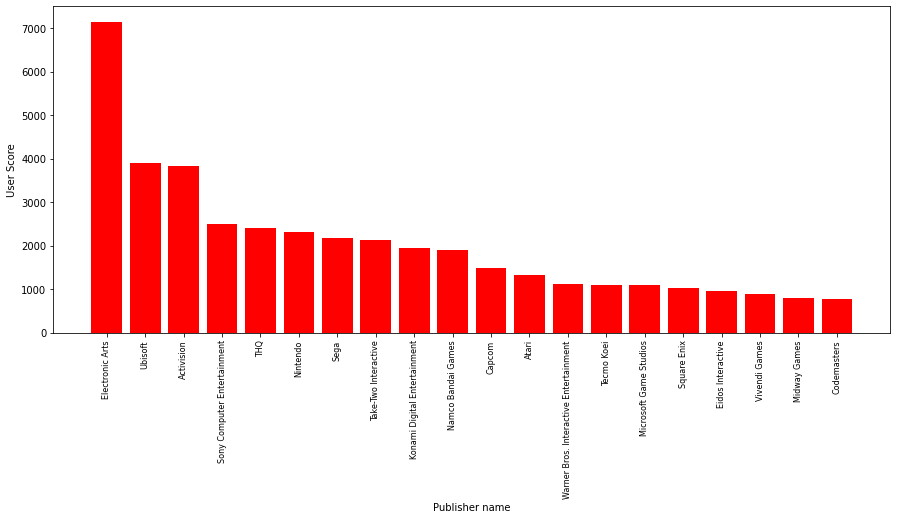

In [67]:
#User Score according to Publisher

y=df.groupby("Publisher").User_Score.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='red')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('User Score')
plt.xlabel('Publisher name')
plt.show()

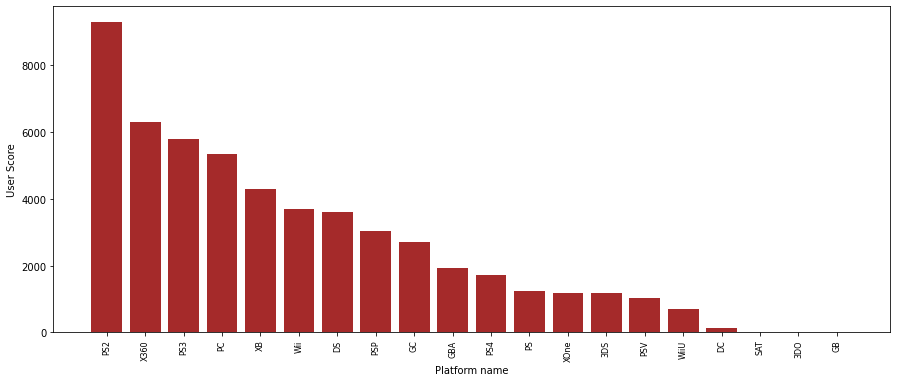

In [68]:
#user Score according to Platform

y=df.groupby("Platform").User_Score.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,6))
plt.bar(y.index,y.values,color='brown')
plt.xticks(y.index,rotation='vertical',size=8)
plt.ylabel('User Score')
plt.xlabel('Platform name')
plt.show()

In [69]:
game_cross = pd.crosstab(df_sales['Platform'], 
            df_sales['Year_of_Release'], margins=True, 
            margins_name="Total", 
           ).T
game_cross

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Total
Year_of_Release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
1981.0,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1982.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
1983.0,11,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
1984.0,1,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1985.0,1,0,0,0,1,0,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14
1986.0,2,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
1987.0,6,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
1988.0,2,0,0,0,0,1,0,0,0,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


Jika kita melihat kolom Total, kita melihat bahwa industri game telah aktif berkembang sejak tahun 1994. Perlu dicatat bahwa rating ESRP telah digunakan sejak tahun 1993. Puncaknya pada tahun 2006 - 2011, kemudian kita melihat penurunan Ini mungkin karena pengembangan game di perangkat seluler untuk Android atau iOS - ponsel, yang tidak ada dalam daftar platform.

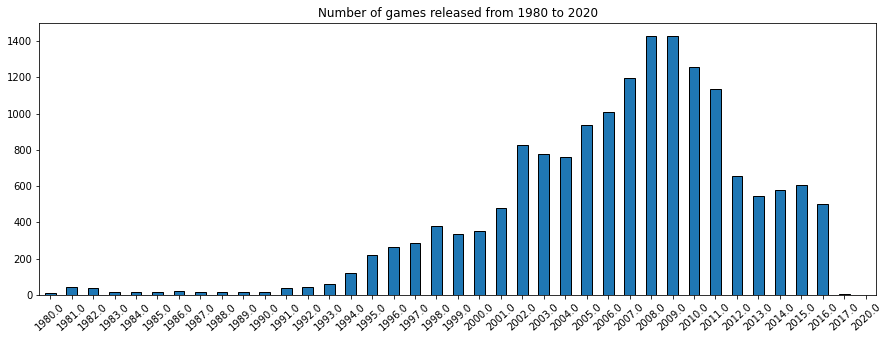

In [70]:
df_sales.groupby('Year_of_Release')['Name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Number of games released from 1980 to 2020')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

In [71]:
df_sales.groupby('Platform')['Global_Sales'].sum().to_frame('Global_Sales').sort_values(by='Global_Sales', ascending=False).head(10)

,Global_Sales
Platform,
PS2,1233.46
X360,961.39
PS3,931.15
Wii,891.74
DS,803.73
PS,727.41
PS4,314.23
GBA,313.56
PSP,289.79


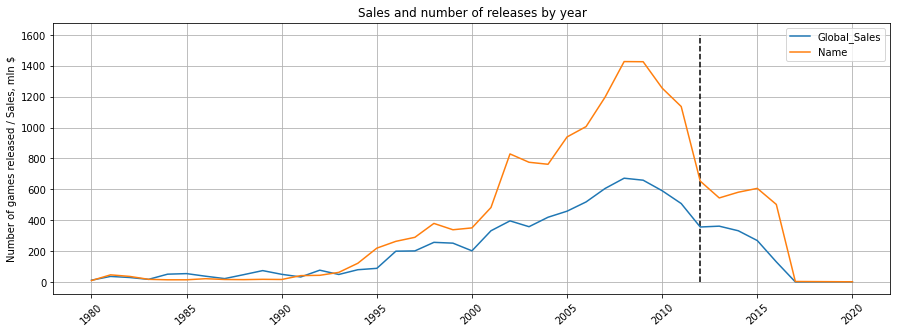

In [72]:
plt.figure(figsize=(15, 5))
ax = plt.gca()
df_sales.groupby('Year_of_Release')['Global_Sales'].sum().plot(legend=True,title='Sales and number of releases by year')
df_sales.groupby('Year_of_Release')['Name'].count().plot(legend=True, grid=True)

plt.ylabel('Number of games released / Sales, mln $')
ax.vlines(x=2012, linestyle='--', color='black', ymin=0, ymax=1600)
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

Disini kita melihat produksi game modern telah aktif berkembang sejak tahun 2001, dan ini mempengaruhi pendapatan. Mari berasumsi bahwa ini disebabkan oleh perkembangan aktif platform konsol, peningkatan kinerja hardware game, yang menyebabkan peningkatan permintaan. Mari kita lihat periode 2012 hingga 2016 terjadi penurunan tajam dalam penjualan dan tren penurunan jumlah game yang diproduksi

In [73]:
games_12_16 = df.query('Year_of_Release >=2012').reset_index(drop=True)
games_12_16.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M


In [74]:
print(games_12_16.isnull().sum())

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1578
Critic_Count       1578
User_Score         1359
User_Count         1359
Developer          1196
Rating             1278
dtype: int64


In [75]:
games_12_16.shape

(2890, 16)

In [76]:
pd.crosstab(games_12_16['Platform'], 
            games_12_16['Year_of_Release'],
            margins=True, margins_name="Total"
           ).sort_values(by='Total', ascending=False)

Year_of_Release,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0,Total
Platform,,,,,,,,
Total,653,544,581,606,502,3,1,2890
PS3,148,126,108,73,38,0,0,493
PSV,53,63,100,110,85,2,0,413
3DS,93,91,80,86,46,0,0,396
PS4,0,16,75,137,164,1,0,393
X360,106,75,63,35,13,0,0,292
PC,61,38,47,50,54,0,0,250
XOne,0,19,61,80,87,0,0,247
PSP,106,54,10,3,0,0,0,173


In [77]:
ps4_df = games_12_16.loc[(games_12_16['Global_Sales'] < 4) 
                               & (games_12_16['Platform']=='PS4')]
ps4_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
58,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,0.59,3.97,92.0,79.0,9.2,10179.0,CD Projekt Red Studio,M
59,Assassin's Creed: Unity,PS4,2014.0,Action,Ubisoft,1.19,2.07,0.08,0.62,3.96,70.0,40.0,4.9,2050.0,"Ubisoft, Ubisoft Montreal",M
60,Batman: Arkham Knight,PS4,2015.0,Action,Warner Bros. Interactive Entertainment,1.53,1.69,0.10,0.64,3.95,87.0,89.0,7.6,2679.0,Rocksteady Studios,M
62,NBA 2K16,PS4,2015.0,Sports,Take-Two Interactive,2.49,0.66,0.03,0.69,3.88,87.0,51.0,6.7,364.0,Visual Concepts,E10+
63,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,1.78,1.43,0.05,0.57,3.83,78.0,49.0,3.7,1564.0,Infinity Ward,M


## PS4. Impact of user reviews and critics.

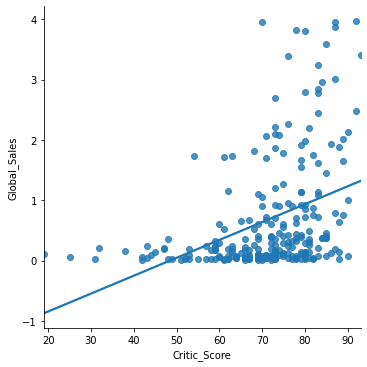

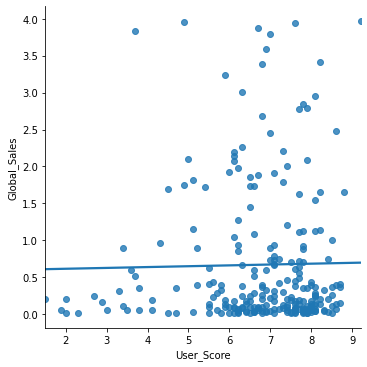

In [78]:
sns.lmplot(x='Critic_Score', y='Global_Sales', data=ps4_df, ci=None)
sns.lmplot(x='User_Score', y='Global_Sales', data=ps4_df, ci=None)

Apabila dilihat dari diagram diatas dapat diperhatikan bahwa Critic_Score memiliki hubungan positif dengan Global_Sales sedangkan User_Score terhadap Global_Sales tidak ada

# XOne. Impact of user reviews and critics.

In [79]:
xone_df = games_12_16.loc[(games_12_16['Global_Sales'] < 4) 
                               & (games_12_16['Platform']=='XOne')]
xone_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
66,Star Wars Battlefront (2015),XOne,2015.0,Shooter,Electronic Arts,2.04,1.28,0.02,0.32,3.66,NaN,NaN,NaN,NaN,NaN,NaN
69,Assassin's Creed: Unity,XOne,2014.0,Action,Ubisoft,2.27,0.90,0.00,0.33,3.50,72.0,59.0,4.1,1005.0,"Ubisoft, Ubisoft Montreal",M
75,Destiny,XOne,2014.0,Shooter,Activision,2.14,0.92,0.00,0.31,3.37,75.0,11.0,5.5,1735.0,"Bungie Software, Bungie",T
80,Gears of War: Ultimate Edition,XOne,2015.0,Shooter,Microsoft Game Studios,2.61,0.33,0.00,0.34,3.28,82.0,74.0,7.5,563.0,"Splash Damage, The Coalition",M
81,FIFA 16,XOne,2015.0,Sports,Electronic Arts,0.89,2.12,0.00,0.24,3.25,84.0,45.0,4.4,459.0,EA Sports,E


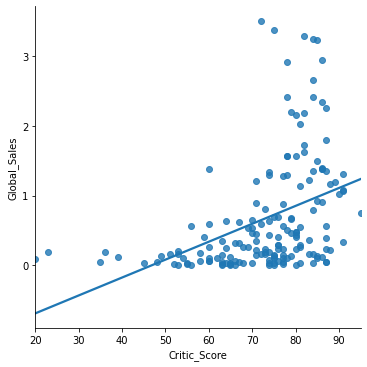

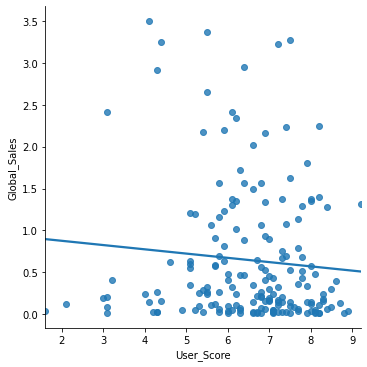

In [80]:
sns.lmplot(x='Critic_Score', y='Global_Sales', data=xone_df, ci=None)
sns.lmplot(x='User_Score', y='Global_Sales', data=xone_df, ci=None)

Apabila dilihat dari diagram diatas dapat diperhatikan bahwa Critic_Score memiliki hubungan positif dengan Global_Sales sedangkan User_Score terhadap Global_Sales tidak ada

## PC. Impact of user reviews and critics.

In [81]:
PC_df = games_12_16.loc[(games_12_16['Global_Sales'] < 4) 
                               & (games_12_16['Platform']=='PC')]
PC_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
90,The Sims 4,PC,2014.0,Simulation,Electronic Arts,1.00,1.82,0.0,0.23,3.05,70.0,74.0,3.9,2057.0,Maxis,T
122,Guild Wars 2,PC,2012.0,Action,NCSoft,0.96,1.07,0.0,0.27,2.31,90.0,69.0,7.9,2954.0,ArenaNet,T
173,World of Warcraft: Mists of Pandaria,PC,2012.0,Role-Playing,Activision,0.84,0.76,0.0,0.22,1.82,82.0,42.0,4.8,1265.0,Blizzard Entertainment,T
196,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,Activision,0.83,0.66,0.0,0.18,1.67,86.0,68.0,7.9,1346.0,Blizzard Entertainment,T
220,Call of Duty: Black Ops II,PC,2012.0,Shooter,Activision,0.64,0.69,0.0,0.19,1.53,74.0,11.0,4.2,1635.0,Treyarch,M


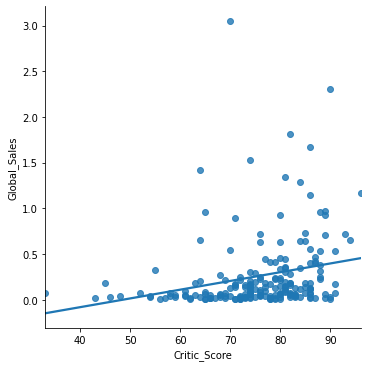

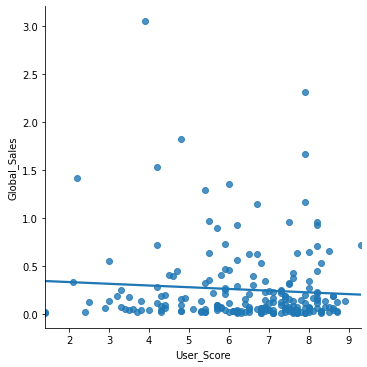

In [82]:
sns.lmplot(x='Critic_Score', y='Global_Sales', data=PC_df, ci=None)
sns.lmplot(x='User_Score', y='Global_Sales', data=PC_df, ci=None)

Apabila dilihat dari diagram diatas dapat diperhatikan bahwa Critic_Score memiliki hubungan positif dengan Global_Sales sedangkan User_Score terhadap Global_Sales tidak ada

## Modelling with Critic Score
  


Data Preparation

In [83]:
df_2= games_12_16.copy()
df_2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
1,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN,NaN,NaN,NaN
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN,NaN,NaN,NaN
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M


In [84]:
df_2.drop(["Year_of_Release", "Name", "NA_Sales","EU_Sales","JP_Sales","Other_Sales","Critic_Count","User_Count","Developer","Rating","Publisher", "User_Score" ], axis = 1, inplace = True)

In [85]:
df_2.Critic_Score = df_2.Critic_Score.fillna(0)
#df_2['Critic_Score'].fillna(int(df_2['Critic_Score'].mean()), inplace=True)

In [86]:
df_2.head(10)

,Platform,Genre,Global_Sales,Critic_Score
0,PS3,Action,21.04,97.0
1,X360,Action,16.27,97.0
2,PS4,Shooter,14.63,0.0
3,3DS,Role-Playing,14.60,0.0
4,PS3,Shooter,13.79,83.0
5,X360,Shooter,13.67,83.0
6,PS4,Action,12.61,97.0
7,3DS,Role-Playing,11.68,0.0
8,X360,Shooter,10.25,73.0
9,3DS,Platform,9.90,78.0


In [87]:
df_dms = pd.get_dummies(games_12_16[["Platform","Genre"]])
df_dms

,Platform_3DS,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2887,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2888,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [88]:
df_final = pd.concat([df_2,df_dms], axis=1)
df_final.head()

,Platform,Genre,Global_Sales,Critic_Score,Platform_3DS,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,PS3,Action,21.04,97.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,X360,Action,16.27,97.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,PS4,Shooter,14.63,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3DS,Role-Playing,14.60,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,PS3,Shooter,13.79,83.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [89]:
df_final.drop(["Platform","Genre"], axis=1, inplace=True)


In [90]:
df_final.head()

,Global_Sales,Critic_Score,Platform_3DS,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,21.04,97.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,16.27,97.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14.63,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,14.60,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,13.79,83.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [92]:
x = df_final.drop("Global_Sales", axis=1)
y = games_12_16["Global_Sales"]

In [93]:
x.shape


(2890, 24)

In [94]:
y.shape

(2890,)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [96]:
rf = RandomForestRegressor().fit(x_train, y_train)
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [97]:
r2_score(y_test, rf.predict(x_test))

-0.21613976153520165

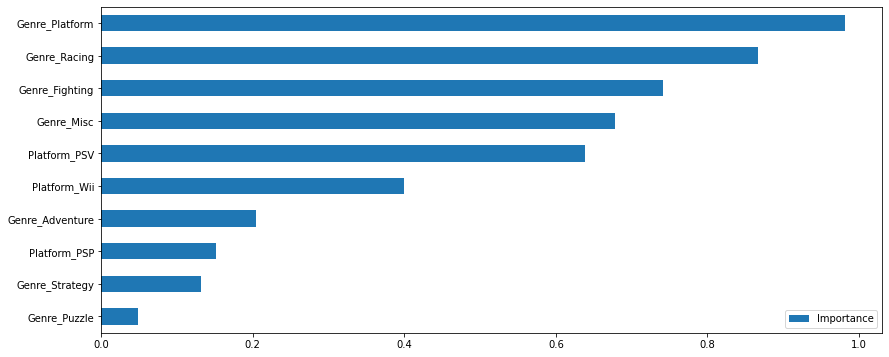

In [98]:
importance = pd.DataFrame({"Importance": rf.feature_importances_*100},
                         index=x_train.columns)

importance.sort_values(by = "Importance", axis=0, ascending=True).iloc[:10,:10].plot(kind="barh",figsize=(14,6))

In [99]:
pipe = make_pipeline(PCA(n_components=3),rf).fit(x_train,y_train)

print('RMSE Train Data:',np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))))
print('RMSE Test Data:',np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))))

RMSE Train Data: 0.85831012673047
RMSE Test Data: 0.8245535349918947


In [100]:
#pipe = make_pipeline(PCA(n_components=3),rf).fit(x_train,y_train)
#print('R Square:',r2_score(y_test, pipe.predict(x_test)))
print('R Square Train Data:',r2_score(y_train, pipe.predict(x_train)))

R Square Train Data: 0.622115436830835


# Linear Regression

In [101]:
import sklearn.linear_model as linear_model

In [102]:
regression_model = linear_model.LinearRegression()

In [103]:
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
model = regression_model.fit(x_train,y_train)

In [105]:
# predict the X using trained model
y_train_pred = regression_model.predict(x_train)
y_test_pred = regression_model.predict(x_test)


In [106]:
# evaluate regression model - RMSE
rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

print('RMSE Training Data: {}'.format(rmse_training))
print('RMSE Test Data: {}'.format(rmse_test))

RMSE Training Data: 1.3190980122400784
RMSE Test Data: 0.7236751129974303


In [107]:
# evaluate regression model - R squared
print('R^2 score:',regression_model.score(x_train, y_train))

R^2 score: 0.1074659163018773


##Modelling Without Critic Score


### Random Forest Regressor

In [108]:
df_final_2 = df_final.copy()

In [109]:
df_final_2.head()

,Global_Sales,Critic_Score,Platform_3DS,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,21.04,97.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,16.27,97.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14.63,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,14.60,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,13.79,83.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [110]:
df_final_2.drop(["Critic_Score"], axis=1, inplace=True)

In [111]:
df_final_2.head()

,Global_Sales,Platform_3DS,Platform_DS,Platform_PC,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,21.04,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,16.27,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14.63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,14.60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,13.79,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [112]:
x = df_final_2.drop("Global_Sales", axis=1)
y = games_12_16["Global_Sales"]

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [114]:
rf = RandomForestRegressor().fit(x_train, y_train)
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [115]:
r2_score(y_test, rf.predict(x_test))

2.9744393043040773e-06

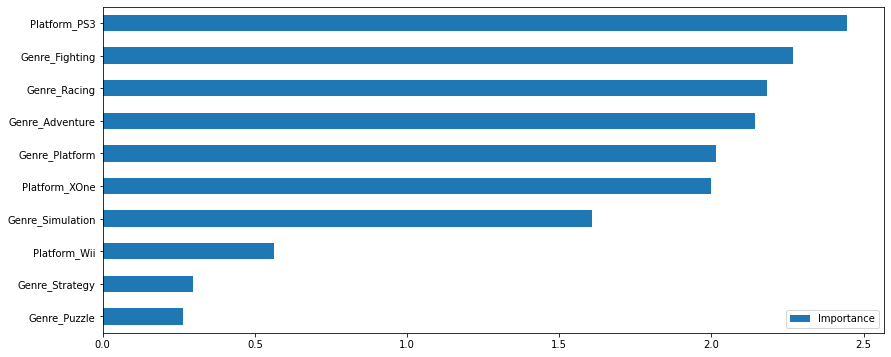

In [116]:
importance = pd.DataFrame({"Importance": rf.feature_importances_*100},
                         index=x_train.columns)

importance.sort_values(by = "Importance", axis=0, ascending=True).iloc[:10,:10].plot(kind="barh",figsize=(14,6))

In [117]:
pipe = make_pipeline(PCA(n_components=3),rf).fit(x_train,y_train)

print('RMSE Train Data:',np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))))
print('RMSE Test Data:',np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))))

RMSE Train Data: 1.3084650527764725
RMSE Test Data: 0.7934846566695847


In [118]:
#pipe = make_pipeline(PCA(n_components=3),rf).fit(x_train,y_train)
#print('R Square:',r2_score(y_test, pipe.predict(x_test)))
print('R Square Train Data:',r2_score(y_train, pipe.predict(x_train)))

R Square Train Data: 0.12179696542412155


## Linear Regression

In [119]:
regression_model = linear_model.LinearRegression()

In [120]:
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
# predict the X using trained model
y_train_pred = regression_model.predict(x_train)
y_test_pred = regression_model.predict(x_test)

In [122]:
# evaluate regression model - RMSE
rmse_training = mean_squared_error(y_true=y_train,y_pred=y_train_pred,squared=False)
rmse_test = mean_squared_error(y_true=y_test,y_pred=y_test_pred,squared=False)

In [123]:
print('RMSE Training Data: {}'.format(rmse_training))
print('RMSE Test Data: {}'.format(rmse_test))

RMSE Training Data: 1.3448669024556548
RMSE Test Data: 0.7644714423623384


In [124]:
# evaluate regression model - R squared
print('R^2 score:',regression_model.score(x_train, y_train))

R^2 score: 0.07225357570779856
